# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [117]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [118]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [119]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [34,37,39]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop=True)
print "Chosen samples of wholesale customers dataset:"
display(samples)
print "Statistical Analysis"
display(samples.describe())

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1502,1979,2262,425,483,395
1,15168,10556,12477,1920,6506,714
2,56159,555,902,10002,212,2916


Statistical Analysis


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,24276.333333,4363.333333,5213.666667,4115.666667,2400.333333,1341.666667
std,28444.124426,5410.063247,6326.879826,5152.227318,3558.192566,1372.710579
min,1502.000000,555.000000,902.000000,425.000000,212.000000,395.000000
25%,8335.000000,1267.000000,1582.000000,1172.500000,347.500000,554.500000
50%,15168.000000,1979.000000,2262.000000,1920.000000,483.000000,714.000000
75%,35663.500000,6267.500000,7369.500000,5961.000000,3494.500000,1815.000000
max,56159.000000,10556.000000,12477.000000,10002.000000,6506.000000,2916.000000


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

Answer:
1. The first sample could be from a Hotel/Motel  as the total cost of all the columns is small, which suits the business model of a small hotel or motel.
2. 2nd business could be a Market/Retailer. If we see the milk cost, it shows that this kind of enterprise uses lots of milk, Fresh products and need Grocery too. All these trait can be of a Grocery store. 
3. 3rd sample relates to a restaurant. If you see the section such as Fresh and Frozen, they seem to indicate that the enterprise deals with lots of fresh and frozen items. A restaurant like a fast food chain could very well be an example of this.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [120]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
grocery = pd.DataFrame(data=data['Grocery'])
new_data = data.drop('Grocery',axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, grocery, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(np.array(X_train),np.array(y_train))

# TODO: Report the score of the prediction using the testing set
score = regressor.score(np.array(X_test),np.array(y_test))
print "Score for predicting the said label: {:,.3f}".format(score)

Score for predicting the said label: 0.682


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

Answer:
1. I tried to predict the "Grocery" column of the dataset
2. The predicted score was 0.682
3. From this score, one thing is certain that the Grocery quantity is correlated to the other quantities and, we can predict, with fair certainity, the "Grocery" quantity. This means that, Grocery is not a feature that is necessary to identify individual customers as I can always get this quantity from its relationship to other features.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

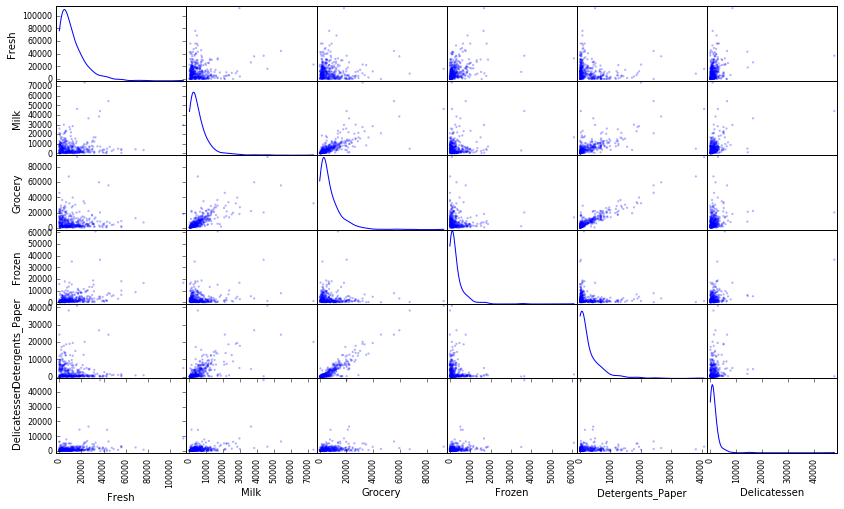

In [121]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

Answer:
1. (Grocery,Detergents_paper),(Grocery,Milk) and (Milk,Detergents_paper) show some correlation between each other.
2. It makes my assumption more sound as there are two features here that can be related to feature "Grocery" thus, making the prediction more accuracte. Also, this makes my conclusion for the previous question more sound making feature "Grocery" less relevant than others.
3. These feature pair show linear distribution. For the features itself, they seem to show a log-normal distribution

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


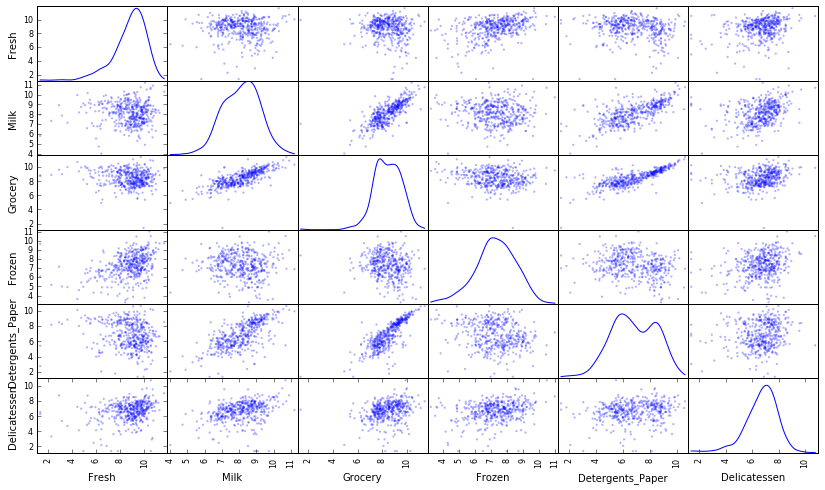

In [122]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(lambda x: np.log(1+x))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(1+x))

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [123]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7.315218,7.590852,7.724447,6.054439,6.182085,5.981414
1,9.627009,9.264544,9.431722,7.560601,8.780634,6.572283
2,10.935960,6.320768,6.805723,9.210640,5.361292,7.978311


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [124]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outliers += list((log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]).index.values)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])


outliers = sorted(list(set(outliers)))
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
81,5.393628,9.163354,9.575261,5.648974,8.964312,5.056246
95,1.386294,7.979681,8.740817,6.089045,5.411646,6.565265
96,3.178054,7.869784,9.001962,4.983607,8.262301,5.384495
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
171,5.303305,10.160569,9.894295,6.480045,9.079548,8.740497
193,5.198497,8.156510,9.918031,6.866933,8.633909,6.502790
218,2.944439,8.923325,9.629445,7.159292,8.475954,8.759826
304,5.087596,8.917445,10.117550,6.426488,9.374498,7.787797


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.040027,11.205027,10.377078,6.895683,9.907031,6.806829
98,6.222576,4.727388,6.658011,6.797940,4.043051,4.890349
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
356,10.029547,4.905275,5.389072,8.057694,2.302585,6.308098


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.432071,9.663325,9.723763,3.526361,8.847504,6.073045
57,8.597482,9.203718,9.257987,3.663562,8.932345,7.156956
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
145,10.000614,9.034200,10.457171,3.761200,9.440817,8.396381
175,7.759614,8.967759,9.382191,3.970292,8.342125,7.437206
264,6.979145,9.177817,9.645105,4.127134,8.696343,7.143618
325,10.395681,9.728241,9.519808,11.016496,7.149132,8.632306
420,8.402231,8.569216,9.490091,3.258097,8.827468,7.239933
429,9.060447,7.467942,8.183397,3.871201,4.442651,7.824846
439,7.933080,7.437795,7.828436,4.189655,6.169611,3.970292


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
161,9.428270,6.293419,5.648974,6.996681,1.386294,7.711549


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
109,7.249215,9.724959,10.274603,6.513230,6.729824,1.386294
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
137,8.035279,8.997271,9.021961,6.495266,6.582025,3.610918
142,10.519673,8.875287,9.018453,8.005033,3.044522,1.386294
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
183,10.514557,10.690831,9.912001,10.506026,5.480639,10.777789
184,5.793014,6.823286,8.457655,4.317488,5.814131,2.484907
187,7.799343,8.987572,9.192176,8.743532,8.149024,1.386294
203,6.369901,6.530878,7.703910,6.152733,6.861711,2.944439


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

Answer: 
1. Yes, there are datapoints that are given out as outliers for more that one feature.
2. Yes and No. Removal of outlier should be dealt with utmost care. If we look at the data and the scatter plot, there are some point which should be removed since, having these points in our dataset will cause noise to creep into our model.All the point which we add to the outlier list can be removed. On the other hand, removal of datapoint should be based on what are we trying to find or classify. For example, if we are aiming to find anomalies in the data then some of these point should be present as we would want our classifier to be trained to detect these kinds of anomalies. When we are trying to find some structured data, we can remove them. Outlier are points which if present in our dataset can influence the performance of our model. They can force the decision surfaces  towards themselves causing many points to be wrongfully classified and thus lead to a poor performing classifier.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

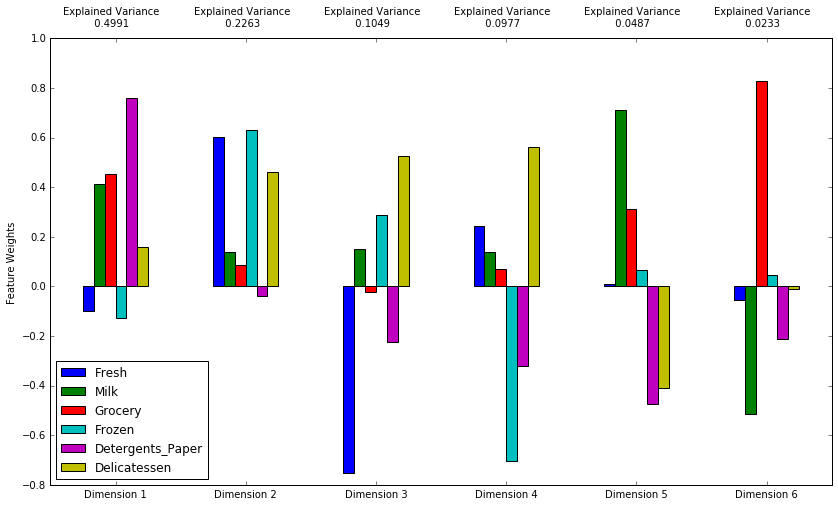

In [125]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
len_features = len(list(good_data.columns))
pca = PCA(n_components=len_features)


# TODO: Transform log_samples using the PCA fit above
pca_data = pca.fit(np.array(good_data)).transform(np.array(good_data))
pca_samples = pca.transform(np.array(log_samples))

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

Answer:
1. 0.7254 of variance is explained by the first 2 principle components
2. The first 4 PC correspond to an explained variance of 0.928
3. In order to understand the correlation between the features, we need to find how strongly they are correlated with each other i.e. which on has the highest feature weight in magnitude. It is entirely subjective to the dataset as to which feature weights we consider large enough. Let's say that a Feature weight of 0.40 is high. In order to analyse all the 4 PC, I have divided the discussion in 4 parts.

1st Principle Component:
There are only 3 features that are equal or above 0.4 namely, "Milk" and "Grocery" "Detergents_Paper". This shows that these 3 components increase together. If one increase, the remaining increase too. Also, the Feature weight of "Detergent_Paper" is highest amongst all which shows that this component can be a measure of customer spending on "Detergent_Paper". It also shows that customers that buy lots of detergent and paper, will also buy lots of Milk and Groceries.

2nd Principle Component:
Again, there are 3 features who's weight is more than 0.40; namely, "Milk", "Frozen" and "Delicatessen". These features also follow the same trend as discussed above where with increase in one feature will lead to an increase in others too. One unique thing to this analysis is how closely features "Milk and "Frozen" are correlated. Since their weight is similar, it shows that a customer who is buying "Frozen" will also buy "Milk" of similar cost.

3rd Principle Component;
Here, there are two features; "Milk" and "Delicatessen". Here the principle component rises with decreasing value of "Milk". Alongside, principle component increase with the increase in "Frozen" feature. This show like a inverse correlation between "Milk" and "Frozen". Customers who are buying more of "Frozen" material have a very less demand of "Milk"

4th Principle Component:
Two features are above 0.4 which makes them useful for analysis, namely, "Frozen" and "Delicatessan". similar to above explanation, they are inversely correlation i.e. a customer buying "Delicatessan" product will more likely not buy lots of "Frozen" products.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [126]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.7890,-2.3299,0.4606,0.1863,-0.0759,-0.1408
1,2.3155,0.5617,-0.9066,-0.4616,0.2964,-0.1992
2,-2.7948,2.5375,-0.2814,-0.0081,-1.4493,-0.1445


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [127]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.fit_transform(np.array(good_data))

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(np.array(log_samples))

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [128]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.7890,-2.3299
1,2.3155,0.5617
2,-2.7948,2.5375


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

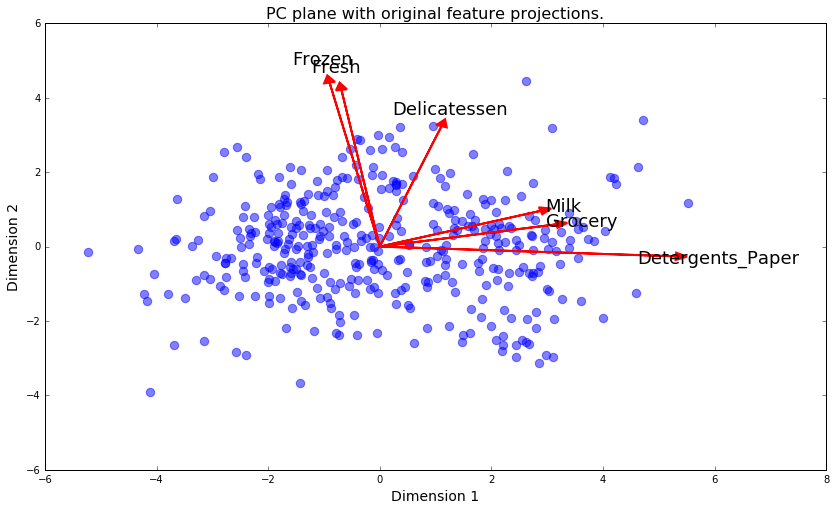

In [129]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca);

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

Answer:

K-Means Clustering:
K-means clustering work well when we have large dataset. They are easy to implement and are computationally simple i.e. they are fast as the order of time complexity is linear with number of datapoints.

Gaussian Mixture Model (GMM) Clustering:
GMM is a technique that is more flexible in terms of cluster covariance. K-means is a special case where the cluster covariance is 0 along all dimension. whereas, GMM will give unconstrained covariance structure. Another advantage of GMM is its ability to accomodate mixture models. In GMM a point belongs to each cluster to a different degree and this degree is based on the probability that the point is generated from each cluster's normal distribution.

I will use the K-mean algorithm, since after our pre-processing if the data, we observe a normal distribution of datapoints. In such cases, K-mean is the best approach as it works best for sphereical clusters with normal distribution. Although, GMM will also work here, but it will be computationally expensive when compared with K-means. Therefore, we use K-means.


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [130]:
# TODO: Apply your clustering algorithm of choice to the reduced data
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters = [x for x in range(2,9)]
score_card = []
for x in n_clusters:
    clusterer = KMeans(n_clusters=x,random_state=42)
    
    # TODO: Predict the cluster for each data point
    preds = clusterer.fit(reduced_data).predict(reduced_data)
    
    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    score_card += [(score,x)]
    print "Silhouette score for {} cluster is: {:,.3f}" .format(x,score)
print "------------------"
score_card = sorted(score_card)[::-1]

## Running for Optimal number of cluster with highest Silhouette Score ##
clusterer = KMeans(n_clusters=score_card[0][1],random_state=42)

preds = clusterer.fit(reduced_data).predict(reduced_data)

centers = clusterer.cluster_centers_

sample_preds = clusterer.predict(pca_samples)

score = silhouette_score(reduced_data,preds)

print "Silhouette Score of optimal number of centers: {:,.3f}" .format(score)

Silhouette score for 2 cluster is: 0.447
Silhouette score for 3 cluster is: 0.365
Silhouette score for 4 cluster is: 0.331
Silhouette score for 5 cluster is: 0.353
Silhouette score for 6 cluster is: 0.364
Silhouette score for 7 cluster is: 0.355
Silhouette score for 8 cluster is: 0.379
------------------
Silhouette Score of optimal number of centers: 0.447


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

Answer:
Silhouette Score Report:
1. Silhouette score for 2 cluster is: 0.447
2. Silhouette score for 3 cluster is: 0.365
3. Silhouette score for 4 cluster is: 0.331
4. Silhouette score for 5 cluster is: 0.353
5. Silhouette score for 6 cluster is: 0.364
6. Silhouette score for 7 cluster is: 0.355
7. Silhouette score for 8 cluster is: 0.379

From this report, it is evident that the silhouette score of cluster with 2 centers is best of them all (0.447)


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

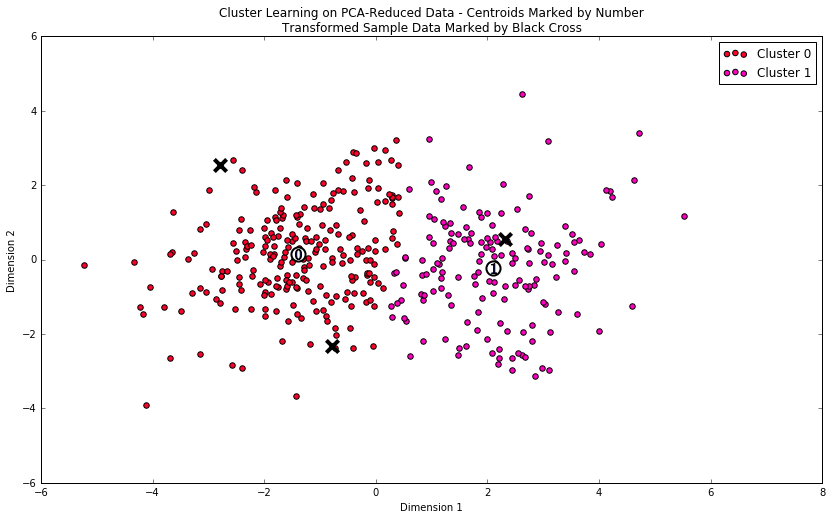

In [131]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [133]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers-1)


# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3479.0,713.0,901.0,810.0,114.0,284.0
Segment 1,1995.0,2866.0,4248.0,414.0,1632.0,419.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

Answer:
Cluster 0/ Segment 0:
This section can comprise of establishment that are small or even individuals like for instance motels, hotels, Restaurants etc.

Cluster 1/ Segment 1:
Segment1 represents Markets, retailers that need all kinds of stuff in their inventory.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [134]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


Answer:
1. I would say that point 0 and point 2 will be part of segment 0 as this segment is correlatable to small businesss, cafe, motels etc. This intuition is also bolstered by my classification intuition that I did in Question 1. Whereas, point 1 belongs to segment 1. This segement can correlate with markets. Again, my intuition before prediction was that such a enterprise can be a retailer which need most of the stuff in bulk when compared with rest of the places.

2. Yes, my prediction are consistent with the prediction calculation code.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

Answer:
Making changes to the delivery system is sure to impact the customers as no two customers are alike in the habits or requirements. Making a sweeping change can be gross simplification of the issue at hand. Here we have 2 segments which have their own requirements. If were to conduct a survey of change in delivery system, I think, the wholesale distributor will receive a generally a positive response from customers in 1 segment. This can be attributed to their purchasing in bulk. Most of the businesses will be able to keep their sales high and not run short of stock if the delivery system is changed from 5 days to 3 days. But, this cannot be said for customers in segment 0. These are customers who purchase in less quantity. This can be seen from their total purchase cost of their centers. If the delivery system is changed, they might not like it since, their stocks are limited. It could be said that they exhaust their stock almost everyday making this change unfeasible for them. So to conclude, generally speaking, segment 1 will be in favor of the change, whereas, segment 0 will not be.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

Answer:

The answer to this question hinges on the assumption that whatever the changes the wholesale distributed soughted in delivery system have been generally accepted by its present customers. Now using this data, the wholesale distributor can make a classification model. The taget values for this model will the cluster labels, whether the new customer belongs to segment 0 or segment 1. The pre-clustered data, in this case, can be used as training and testing data. Once, the wholesale distributor has acceptable performance, they can put the newly acquired exstimates from the new customers and the model will spew out the segment in which a certain customer will fall in. Thus, allowing the distributor to segregate the newly acquired customers.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

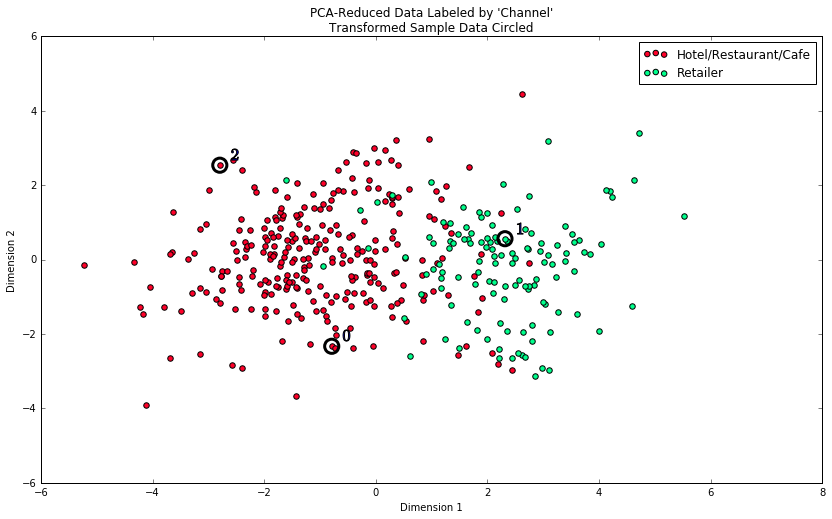

In [135]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

Answer:
1. The clustering done by me and the distribution above are in agreement when it come the number of cluster centers. The optimal number of cluster from my model is 2 and same classification is seen above.  The classification done by me and the plot above are also in agreement. As per my classification, segment 0 classifies as the Hotel catagory and segment 1 corresponds to Market/Retailer. 

2. It certainly looks like there are points which can be classified as purely Retailer or Hotel/Restaurant/Cafe but, this distribution has lot of outliers.As we can see that it has classified some point which seem to closer to Hotel center to be Retailer and same is also observable for some points near the retailer center.

3. I would consider my definition of customer segments to be largly siding with the above classification baring few points which my model will label wrong since they where considered as outliers by me during data processing step.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.